In [8]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import time
# 


In [9]:
# creates synthetic cluster data. K is number of clusters, N is the number of points per cluster
# mean_b is used to genearte means for the multivaraiate data.
def create_random_clusters(K =3, N = 30, mean_b = 6):
    return np.concatenate([npr.multivariate_normal(mean = [npr.randint(-mean_b,mean_b),npr.randint(-mean_b,mean_b)],
                                                   cov = [[0.5,0],[0,0.5]], size = N) for kk in range(K)])



[[<matplotlib.lines.Line2D at 0x7fbd63f26898>],

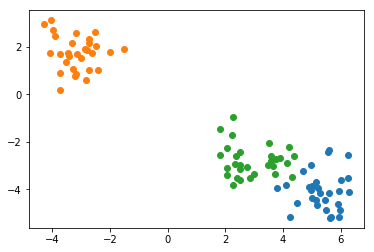

In [10]:
%matplotlib inline
X = create_random_clusters()
K=3
[plt.plot(*X_split.T,'o' )for X_split in np.split(X,K)]

In [11]:
def plot_centroids(ax, centroids):
    x = centroids[:,0]
    y = centroids[:,1]
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x);line.set_ydata(y);line.set_marker('s');line.set_markersize(20); line.set_linewidth(0)
    else:
        ax.plot(x,y, marker = 's', markersize = 20)
    fig.canvas.draw()

def plot_points(ax, X, K, closest_centroid):
    ax.set_prop_cycle(None)
    for kk in range(K):
        ax.plot(*X[closest_centroid == kk].T,  'o')
    fig.canvas.draw()

def plot_J(ax, J):
    ax.plot(J, '-kx')
    fig.canvas.draw()
    


In [12]:
X = create_random_clusters()

<IPython.core.display.Javascript object>


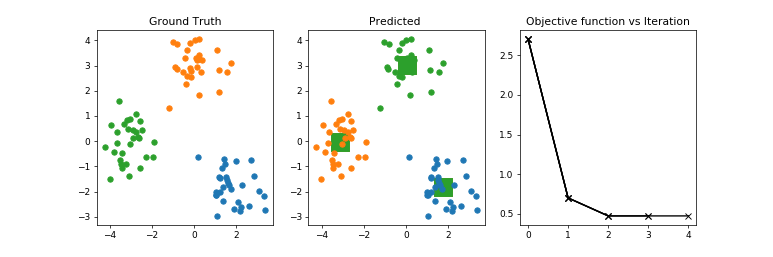

In [18]:
%matplotlib notebook


K = 3
# pick K random centroids
centroids = X[(np.random.choice(len(X), K, replace = False))]

# reshape centroids for broadcasting operation.
def centroids_reshaped(centroids):
    return centroids.T.reshape(1,-1,K)

# prepare the figure object and plot the points
fig,ax = plt.subplots(1,3, figsize = (12,4))
ax[0].set_title('Ground Truth')
[ax[0].plot(*X_split.T,'o' )for X_split in np.split(X,K)]
ax[1].set_title('Predicted ')
ax[1].plot(*X.T, 'o')
ax[2].set_title('Objective function vs Iteration')

J = []
for i in range(5):
    plot_centroids(ax[1], centroids) # plot the centroids
    # calculate the closest centroids for each point
    closest_centroid = np.argmin(np.linalg.norm(X[...,None]-centroids_reshaped(centroids), axis = 1),axis = 1)
    plot_points(ax[1], X, K, closest_centroid)
    #calculate the new centroids
    centroids = np.array([X[closest_centroid == kk].mean(axis = 0) for kk in range(K)])
    # calculate the objective function
    J.append(((X-centroids[closest_centroid])**2).mean())
    plot_J(ax[2],J)
    time.sleep(0.25)
    plt.savefig(str(i)+'.png')
    

